## scikit-learn中的逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array((X[:,0]**2 + X[:,1])<1.5,dtype='int')
for _ in range(20):
    y[np.random.random_integers(200)] = 1

J:\anacoda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 200 + 1) instead
  """


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

J:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.7733333333333333
0.84


In [12]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [34]:
def ployLogisticRegression(degree=2,C=1):
    return Pipeline([
        ('ploy',PolynomialFeatures(degree=degree)),
        ('std',StandardScaler()),
        ('log_reg',LogisticRegression(C=C,n_jobs=-1))
    ])

In [35]:
ploy_log_reg = ployLogisticRegression()
ploy_log_reg.fit(X_train,y_train)
print(ploy_log_reg.score(X_train,y_train))
print(ploy_log_reg.score(X_test,y_test))

0.8333333333333334
0.94


J:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
J:\anacoda\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


J:\anacoda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


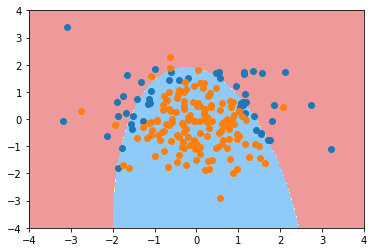

In [33]:
plot_decision_boundary(ploy_log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()





